In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# for interactive 3D plot
# %matplotlib notebook 
%matplotlib inline 

# Logistic Model

### Dataset
Attributes:
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(url, header=None, names=['Preg', 'Gluc', 'BP', 'Skin', 'Insul', 'BMI', 'Pedigree', 'Age', 'Outcome'])
df.head()

,Preg,Gluc,BP,Skin,Insul,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corr()

,Preg,Gluc,BP,Skin,Insul,BMI,Pedigree,Age,Outcome
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Gluc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insul,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
# Top 4 highly correlated attributes 
x = df['Age']
y = df['Gluc']
z = df['BMI']
s = df['Preg']
c = df['Outcome']

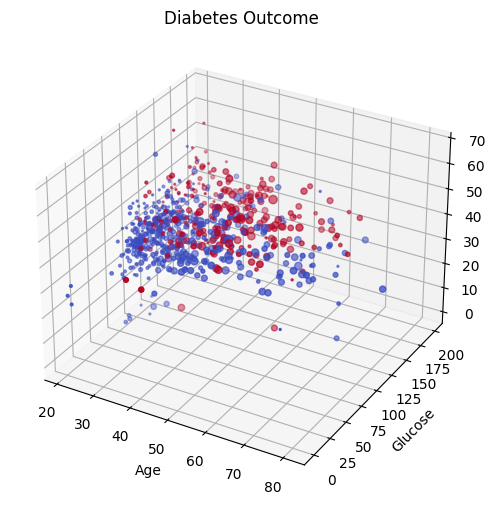

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=c,s=(s+1)*2, cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Glucose')
ax.set_zlabel('Preganancy')
ax.set_title('Diabetes Outcome')
plt.show()


# Train Test Split

In [7]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']
X = sm.add_constant(X) # design matrix

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Building Model

In [8]:
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.467835
         Iterations 6


In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Wed, 29 Mar 2023   Pseudo R-squ.:                  0.2752
Time:                        11:45:53   Log-Likelihood:                -287.25
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 9.311e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0359      0.837    -10.802      0.000     -10.675      -7.396
Preg           0.0645      0.036      1.791      0.073      -0.006       0.135
Gluc           0.0341      0.004      8.055      0.000       0.026       0.042
BP            -0.0139      0.006     -2.260      0.024      -0.026      -0.002
Skin           0.0031      0.008      0.397      0.691      -0.012       0.019
Insul         -0.0018      0.001     -1.782      0.075      -0.004       0.000
BMI            0.1026      0.017      5.948      0.000       0.069       0.136
Pedigree       0.6945      0.330      2.107      0.035       0.049       1.341
Age            0.0371      0.011      3.400      0.001       0.016       0.058
==============================================================================
"""

# Validating

In [10]:
probs = result.predict(X_test)

In [11]:
y_pred = round(probs).astype(int) # rounding up the probability 0 & 1

In [12]:
print("Model Accuracy: ",accuracy_score(y_test,y_pred))

Model Accuracy:  0.7532467532467533


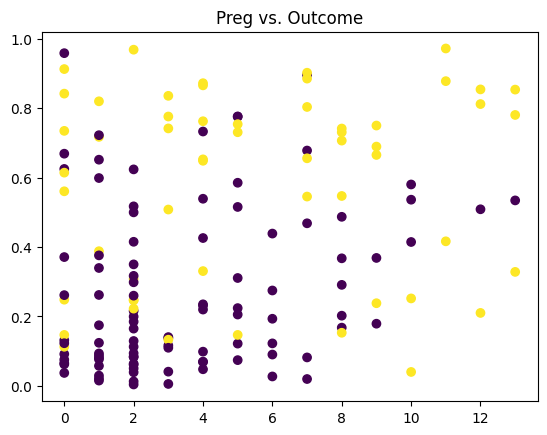

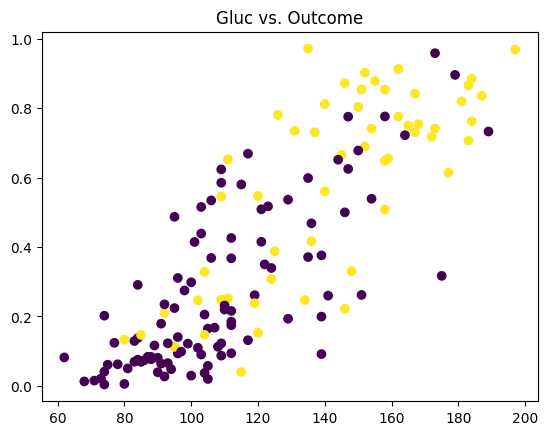

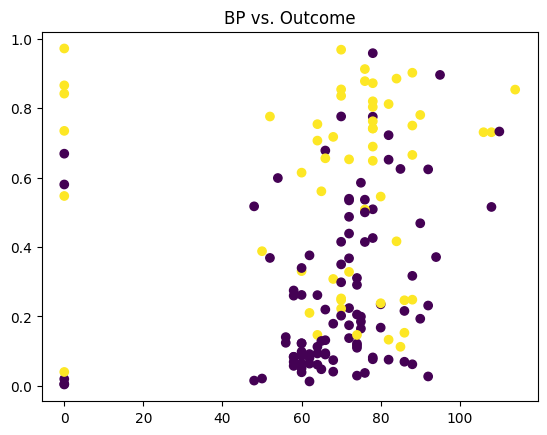

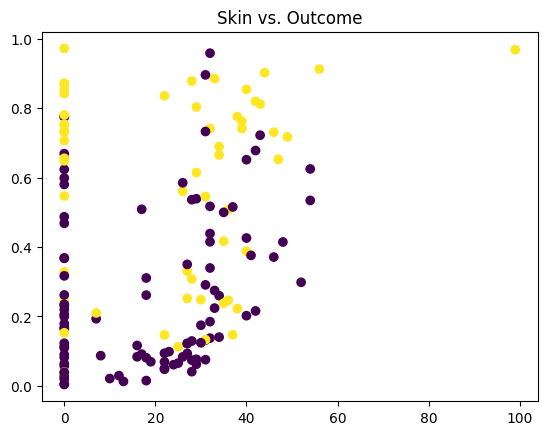

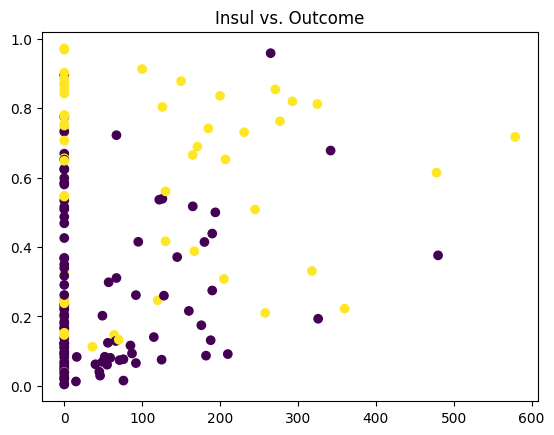

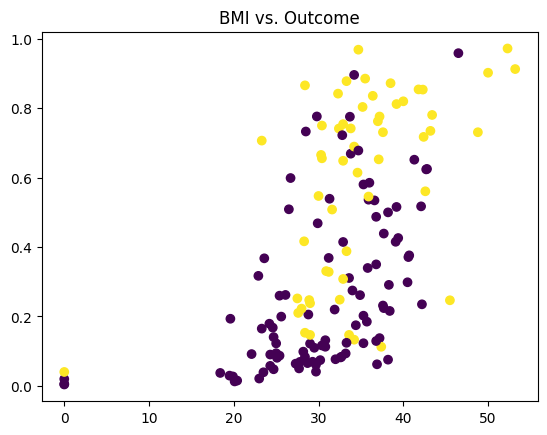

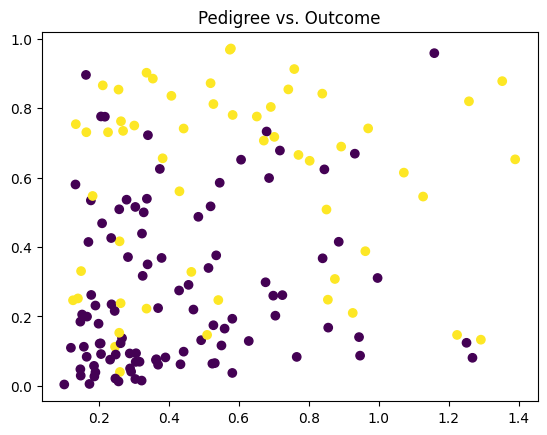

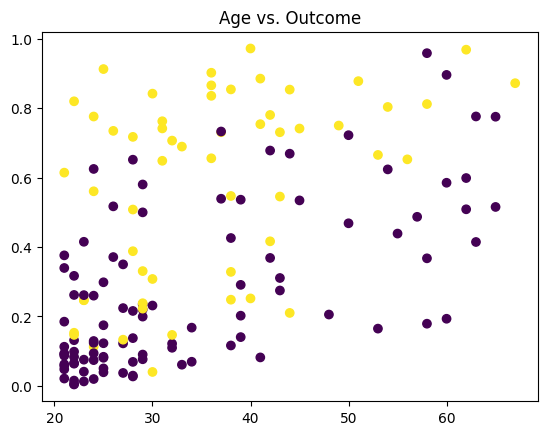

In [13]:
for x in X.columns[1:]:
    plt.scatter(x=X_test[x], y=probs, c=y_test)
    plt.title(f'{x} vs. Outcome')
    plt.show()